In [2]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle, datetime
import pandas as pd
import hydracv.utils.utils as utils

In [3]:
def load_fluo(filename, start=0, end=-1):
    fluo = pd.read_csv(filename).values.reshape(-1)
    if end == -1:
        end = len(fluo)
    plt.figure(figsize=(20, 3))
    plt.plot(fluo, linewidth=1, color='g')
    plt.xlim(start, end)
    plt.show()
    return fluo

In [4]:
FILENAME = "total_fluo_Control-EGCaMP_exp1_a1_30x10fps_5%.csv"
FPS = 10

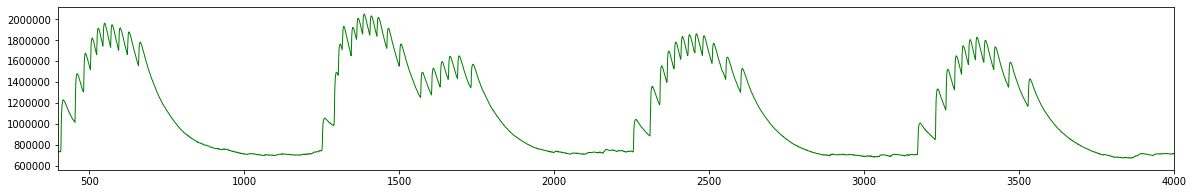

In [5]:
# Load fluorescence
fluo = load_fluo("./data/fluorescence/" + FILENAME, start=400, end=4000)

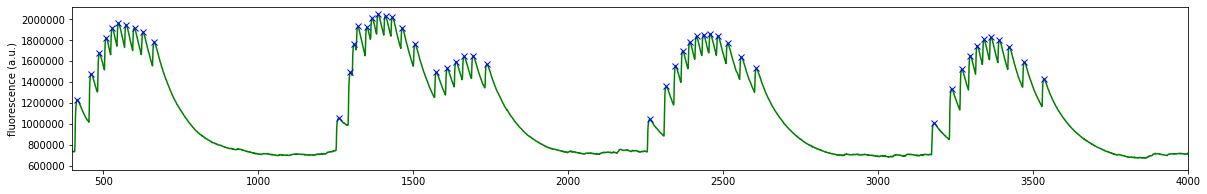

In [6]:
# Find peaks
peaks = utils.find_peaks(fluo, start=400, prominence=0.02, end=4000)

In [8]:
# Cluster peaks
peaks_clustered = utils.cluster_peaks(peaks, min_cb_interval=300, realign=False)

In [10]:
peaks_clustered

array([list([417, 461, 488, 510, 529, 549, 574, 601, 629, 664]),
       list([1260, 1297, 1310, 1321, 1351, 1367, 1388, 1411, 1433, 1465, 1506, 1575, 1610, 1639, 1664, 1693, 1738]),
       list([2264, 2316, 2346, 2370, 2392, 2414, 2437, 2458, 2483, 2515, 2559, 2607]),
       list([3181, 3238, 3269, 3297, 3319, 3342, 3364, 3391, 3423, 3471, 3535])],
      dtype=object)

In [53]:
# Transform the peaks to real time for the model
first_peak = peaks_clustered[0][0]
stim_fast = []
stim_fast.append([(x - first_peak) / FPS for x in peaks_clustered[0]])
for li in peaks_clustered:
    stim_fast.append([(x - first_peak) / FPS + 100 for x in li])

In [54]:
for li in stim_fast:
    print(li)

[0.0, 4.4, 7.1, 9.3, 11.2, 13.2, 15.7, 18.4, 21.2, 24.7]
[100.0, 104.4, 107.1, 109.3, 111.2, 113.2, 115.7, 118.4, 121.2, 124.7]
[184.3, 188.0, 189.3, 190.4, 193.4, 195.0, 197.1, 199.4, 201.6, 204.8, 208.9, 215.8, 219.3, 222.2, 224.7, 227.6, 232.1]
[284.7, 289.9, 292.9, 295.3, 297.5, 299.7, 302.0, 304.1, 306.6, 309.8, 314.2, 319.0]
[376.4, 382.1, 385.2, 388.0, 390.2, 392.5, 394.7, 397.4, 400.6, 405.4, 411.8]
